In [2]:
%%capture
import struct 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import pandas as pd
from helpers import read_echogram

class EchoGram:
    def __init__(self, filename, channels=None, depthline=False):
        """data is a list of dictionaries
        echo is an nd array (2D=only rows and columns)
        """
        self.filename = filename
        self.data, self.echo = self.test_overlay_wb_echo(filename, channels, depthline)
        
    def test_overlay_wb_echo(self, filename, channels=None, depthline=False):
        # Load sounding data and echogram.
        data, echo = read_echogram(filename, channels)

        ## Calculate sampling rate, using assumption that y-axis is in depth (ft)
        ## - not actually used in this function but given here as an illustration.
        # time1 = np.array([i["time1"] for i in data])
        # dz = time1[1:] - time1[:-1]
        if depthline:
            ## Calculate the water depth in y-axis samples
            wb = np.array([i["water_depth"] for i in data])
            lower_limit = np.array([i["lower_limit"] for i in data])
            wb_s =  wb * echo.shape[0] / lower_limit

        fig, axes = plt.subplots()
        axes.imshow(echo, aspect='auto')
        if depthline:
            axes.plot([i["frame_index"] for i in data],
                        wb_s, linewidth=2, color="red")
        fig.show()
        #fig.savefig('sss.png', dpi=fig.dpi)
        return data, echo

### Datasets:
- './log-data-lowrance/Sonar_2021-10-16_12.53.38.sl2'    
- './log-data-lowrance/Sonar_2021-10-16_13.29.30.sl2'
- './log-data-lowrance/Sonar_2021-10-16_13.29.36.sl2'
- './log-data-lowrance/Sonar_2021-10-16_14.21.09.sl2'
- './log-data-lowrance/Sonar_2021-10-16_14.38.24.sl2'

### Channel (sonar sensor type)
- 0 = Primary (Traditional Sonar)
- 1 = Secondary (Traditional Sonar)
- 2 = DSI (Downscan Imaging)
- 3 = Sidescan Left
- 4 = Sidescan Right
- 5 = Sidescan (Composite)
Another other value is treated as Invalid.

## File:Sonar_2021-10-16_12.53.38 Speed=4mph

  0%|          | 0.00/415M [00:00<?, ?B/s]

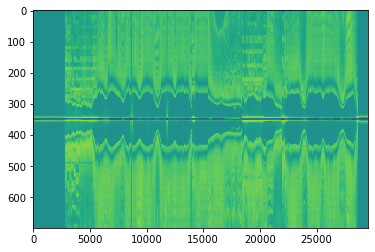

In [3]:
echogram1 = EchoGram('./log-data-lowrance/Sonar_2021-10-16_12.53.38.sl2', channels=[5])

In [35]:
print("keys of the data dictionary: ", echogram1.data[0].keys(), "\n")
print("first values of each keys of the  data dictionary: ", echogram1.data[0], "\n")

keys of the data dictionary:  dict_keys(['offset', 'previous_primary_offset', 'previous_secondary_offset', 'previous_downscan_offset', 'previous_left_sidescan_offset', 'previous_right_sidescan_offset', 'previous_composite_sidescan_offset', 'framesize', 'previous_framesize', 'channel', 'packetsize', 'frame_index', 'upper_limit', 'lower_limit', 'frequency', 'water_depth', 'keel_depth', 'gps_speed', 'temperature', 'lon_enc', 'lat_enc', 'water_speed', 'course', 'altitude', 'heading', 'flags', 'time1', 'has_altitude', 'has_heading', 'has_track', 'has_water_speed', 'has_position', 'has_packet', 'has_temperature', 'has_gps_speed', 'gps_speed_kph', 'longitude', 'latitude', 'water_depth_m', 'headersize', 'heading_deg']) 

first values of each keys of the  data dictionary:  {'offset': 8, 'previous_primary_offset': 0, 'previous_secondary_offset': 0, 'previous_downscan_offset': 0, 'previous_left_sidescan_offset': 0, 'previous_right_sidescan_offset': 0, 'previous_composite_sidescan_offset': 8, 'fra

In [5]:
print("echo shape:",echogram1.echo.shape)
print("type(data):",type(echogram1.data))
print("length:",len(echogram1.data))
print("min intensity=",min(echogram1.echo.flat))
print("max intensity=",max(echogram1.echo.flat))

echo shape: (700, 29551)
type(data): <class 'list'>
length: 29551


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<Figure size 432x288 with 0 Axes>

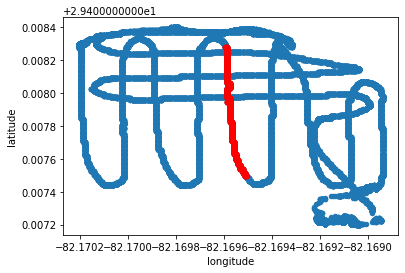

In [4]:
df = pd.DataFrame(echogram1.data)
fig = plt.figure()
ax1 = df.plot.scatter(x="longitude", y="latitude")
df.loc[9600:10800,:].plot.scatter(x="longitude", y="latitude", c='red', ax=ax1)

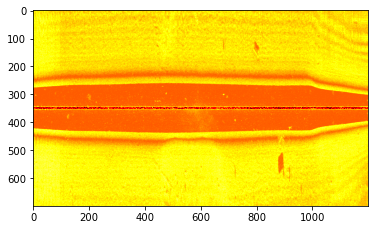

In [15]:
#plt.imshow(echogram1.echo[:,int(cols*9/10):-1],) # show segments of the echo image
vmin = min(echogram1.echo.flat)
vmax = max(echogram1.echo.flat)
plt.imshow(echogram1.echo[:,9600:10800], cmap='hot', vmin=vmin, vmax=vmax)
plt.colorbar()

## File:Sonar_2021-10-16_13.29.36 Speed=6mph

  0%|          | 0.00/327M [00:00<?, ?B/s]

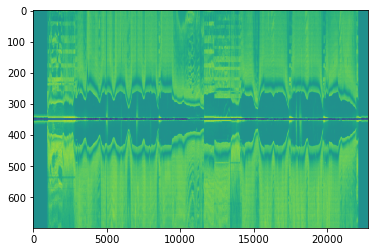

In [8]:
echogram6mph = EchoGram('./log-data-lowrance/Sonar_2021-10-16_13.29.36.sl2', channels=[5])

length:  22784


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<Figure size 432x288 with 0 Axes>

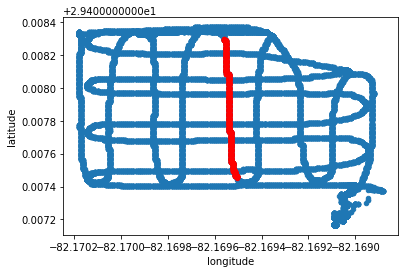

In [34]:
df2 = pd.DataFrame(echogram6mph.data)
print("length: ",len(df2['longitude']))
print(echogram6mph.echo
fig = plt.figure()
ax2 = df2.plot.scatter(x="longitude", y="latitude")
df2.loc[5600:6400,:].plot.scatter(x="longitude", y="latitude", c='red', ax=ax2)

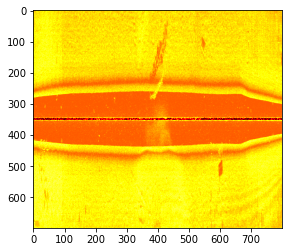

In [34]:
plt.imshow(echogram6mph.echo[:,5600:6400], cmap='hot')

# Point Cloud Generation

60 to 85 degrees  Source:https://www.sportfishingmag.com/how-imaging-sonar-helps-you-find-fish/
<div>
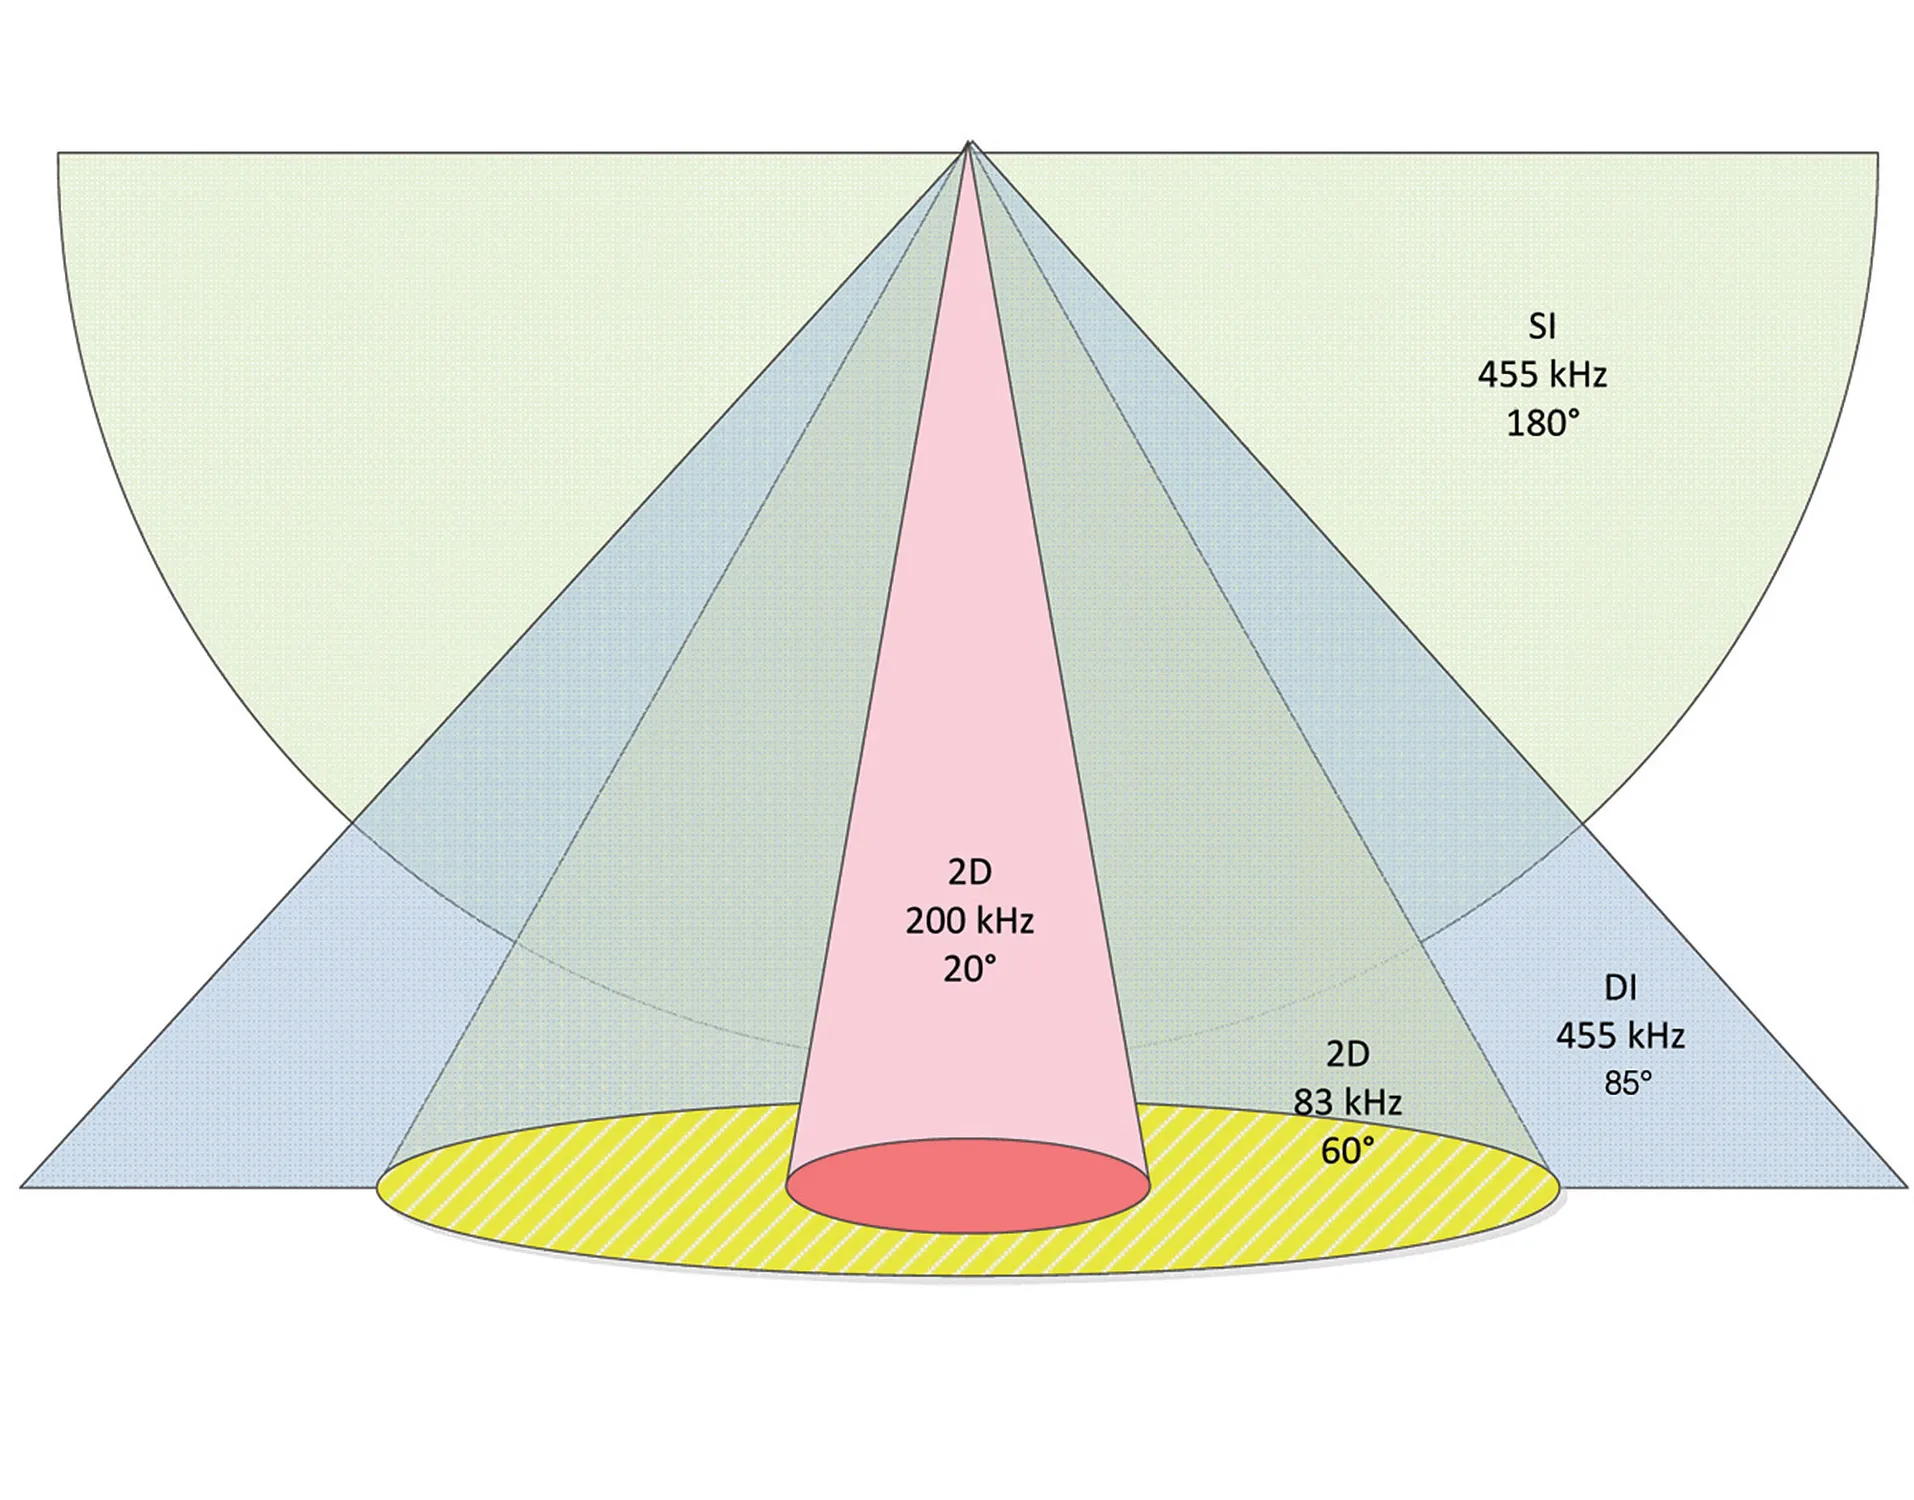
</div>

shape:  (700, 800)


Text(0, 0.5, 'depth [m]')

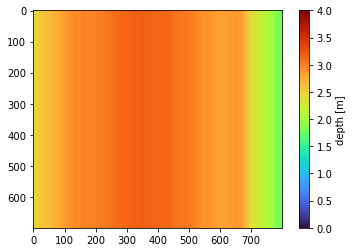

In [77]:
## Initialize values

#df2 = pd.DataFrame(echogram6mph.data)
sss = plt.imread('./images/sss.png') # image file, ndarray, with shape: (288, 432, 4)
sss_intensity = echogram6mph.echo[:, 5600:6400]
rows, columns = sss_intensity.shape  # 700
print("shape: ", sss_intensity.shape)
## Z
depth_m = df2.loc[5600:6400,:]['water_depth_m'].to_numpy()  # ndarray shape: (801,)
depth_m = depth_m[0:-1]
Z = np.tile(depth_m, (rows, 1))  # grid of depth values repeated in per row in meters (TO REPEAT AN ARRAY AS A ROW)
plt.imshow(Z, cmap='turbo', interpolation='nearest', vmin=0, vmax=4)
cbar = plt.colorbar()
cbar.ax.set_ylabel('depth [m]')
## X

x_m = 

Text(0, 0.5, 'angles [rad]')

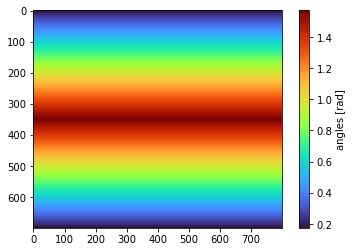

In [96]:
# Fixed Coordinate system: x - front, y - right, z - down 
alpha = 40
theta = 30
alpha_max = theta + alpha/2
alpha_min = theta - alpha/2
angles_rad = np.radians(np.concatenate((np.linspace(alpha_min,90,int(rows/2)),np.linspace(90,alpha_min,int(rows/2))))) # array of angles starting at zero, 90deg at the middle and then zero
angles_rad = np.transpose([angles_rad] * columns)  # TO REPEAT AN ARRAY AS A COLUMN
## Y
y_m = np.zeros((rows, columns))
y_m = np.divide(Z, angles_rad)
y_m[0:350,:] = y_m[0:350]*(-1)
plt.imshow(angles_rad, cmap='turbo', interpolation='nearest')
cbar = plt.colorbar()
cbar.ax.set_ylabel('angles [rad]')

Text(0, 0.5, 'y coord [m]')

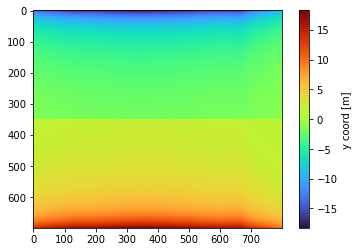

In [97]:
plt.imshow(y_m, cmap='turbo', interpolation='nearest')
cbar = plt.colorbar()
cbar.ax.set_ylabel('y coord [m]')

### Angles:

<div>
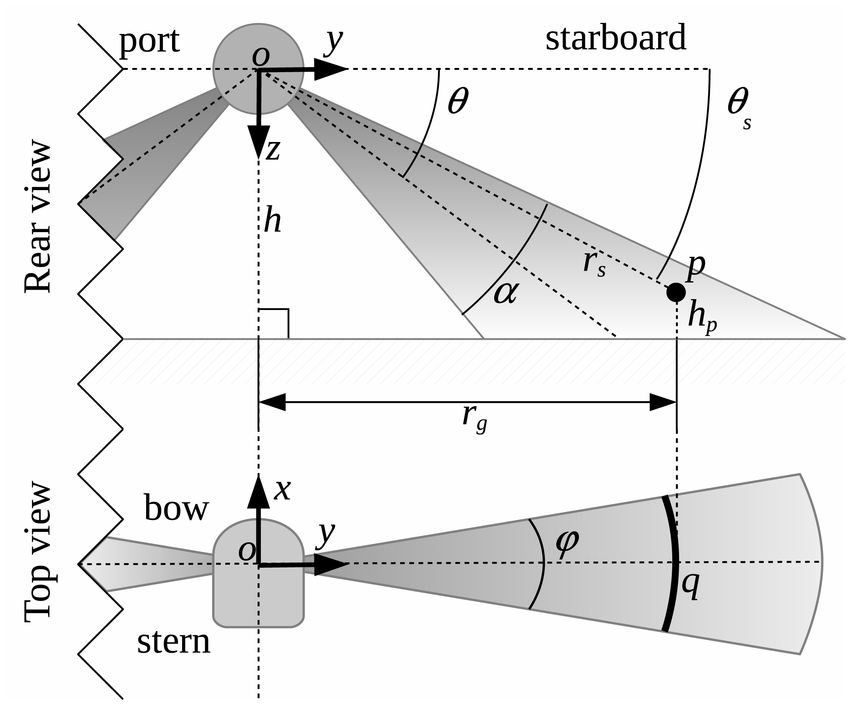
</div>

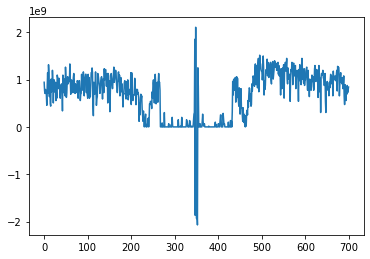

In [98]:
plt.plot(range(700),echogram1.echo[:,15103])

## Coiras, et al.Replication

In [20]:
lambda_cons = 0.25
R = np.ones(rows, columns)*0.9  # reflectivity (typically from 0 to 1)
Phi = np.median(Z)  # still confused with what to assign this to
I_max = np.divide(-Z + np.divide(x**2*(1+dy*Z)**2,-Z), np.sqrt(x**2+Z**2)*(1+(dy*Z)**2 + np.divide(x**2*(1+(dy*Z)**2),-Z**2)))
K_reflec = np.divide(1, I_max) 

700

In [ ]:
while E < 0.1:
    ## Partial Derivatives by Finite Difference
    dZ_dx[] =
    dZ_dy = 
    
    I_hat = -K*Phi*R*(np.divide(Z-x*dZ_dx, np.sqrt(x**2+Z**2)*np.sqrt(dZ_dx**2 + dZ_dy**2 + 1)))
    E = np.sum((I - I_hat)**2)
    

    ## Optimization (expectation maximization)

    R = R + np.divide(2*lambda_cons*I_hat*(I-I_hat),R)
    Phi = Phi + np.divide(2*lambda_cons*I_hat*(I-I_hat),Phi)
    Z = Z - 2*lambda_cons*(I-I_hat)*(np.divide(-dZ_dy - dZ_dx,1 + dZ_dy**2 + dZ_dx**2) + np.divide(1+x, x*dZ_dx - Z) + np.divide(Z, x**2 + Z**2))